In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [69]:
df = pd.read_csv('D:\Downloads\seeds_dataset.csv')
df.head()

,0,1,2,3,4,5,6,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [70]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: target, Length: 210, dtype: int64

In [71]:
X = df.drop(['target'],axis=1)
X

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [72]:
Y = df['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: target, Length: 210, dtype: int64

In [56]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

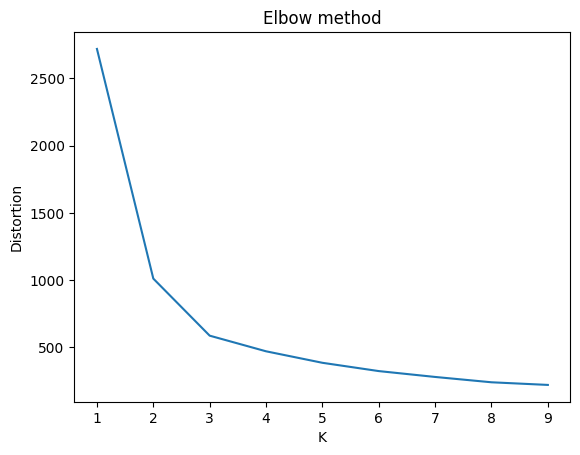

In [57]:
number_clusters = range(1,10)
plt.plot(number_clusters, distortions)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow method')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [59]:
X['k_means'] = kmeans.predict(X)
X

,0,1,2,3,4,5,6,k_means
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [67]:
plt.scatter(x=X[0],y=X[1],c=kmeans.label_)
plt.show()

KeyError: 0

In [73]:
silhouette = []
K = range(2,10) 
#the silhouette score() functions needs a minimum of
#2 clusters, or it will raise an exception
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    score = silhouette_score(X,kmeans.labels_,metric='euclidean')
    silhouette.append(score)

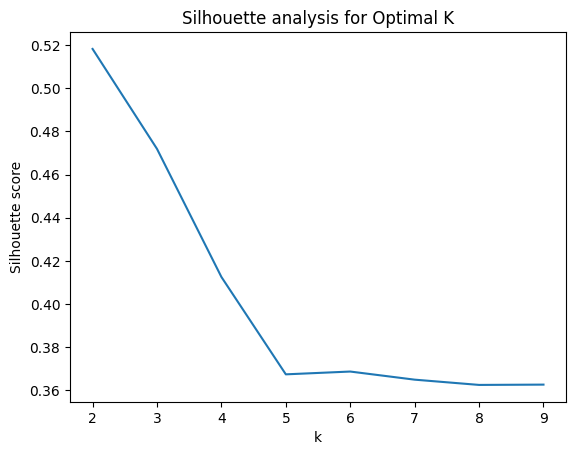

In [74]:
plt.plot(K,silhouette)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for Optimal K')
plt.show()